Lista Código 2 -

Arthur Resende Santos
12011bcc020

# Exercício 1:

Letra a)

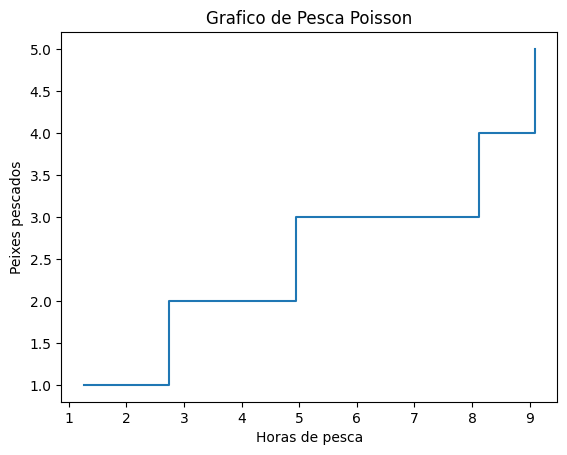

In [115]:
import numpy as np
import matplotlib.pyplot as plt

horas_pescaria = 10
lambda_peixes = 1
tempo_limpeza = 0.5

tempo_total = 0
peixes_pescados = 0
registro_peixes = []

while tempo_total < horas_pescaria:
    chegada_peixe = np.random.exponential(1/lambda_peixes)
    tempo_total += chegada_peixe
    if tempo_total < horas_pescaria:
        tempo_total += tempo_limpeza
        peixes_pescados += 1
        registro_peixes.append((tempo_total, peixes_pescados))


tempo, quantidade = zip(*registro_peixes)
plt.step(tempo, quantidade, where='post')
plt.xlabel('Horas de pesca')
plt.ylabel('Peixes pescados')
plt.title('Grafico de Pesca Poisson')
plt.show()

Letra b)

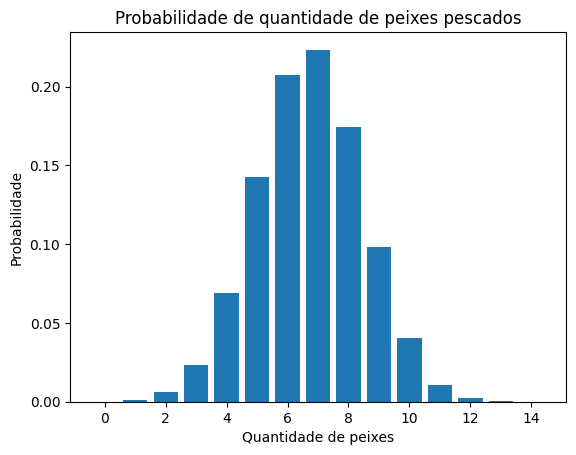

In [24]:
num_simulacoes = 100000
resultados_simulacao = []

for _ in range(num_simulacoes):
    tempo_total = 0
    peixes_pescados = 0

    while tempo_total < horas_pescaria:
        chegada_peixe = np.random.exponential(1/lambda_peixes)
        tempo_total += chegada_peixe
        if tempo_total < horas_pescaria:
            tempo_total += tempo_limpeza
            peixes_pescados += 1

    resultados_simulacao.append(peixes_pescados)


quantidades_peixes, contagem = np.unique(resultados_simulacao, return_counts=True)
probabilidades = contagem / num_simulacoes

plt.bar(quantidades_peixes, probabilidades)
plt.xlabel('Numero de peixes')
plt.ylabel('Probabilidade')
plt.title('Probabilidades por peixe pescado')
plt.show()

Letra c)

In [27]:
media_simulada = np.mean(resultados_simulacao)
variancia_simulada = np.var(resultados_simulacao)

media_poisson = horas_pescaria * lambda_peixes
variancia_poisson = horas_pescaria * lambda_peixes

print("Media dos resultados simulados:", media_simulada)
print("Variancia dos resultados simulados:", variancia_simulada)
print("Media da distribuicao de Poisson teorica:", media_poisson)
print("Variancia da distribuicao de Poisson teorica:", variancia_poisson)

Média dos resultados simulados: 6.71848
Variância dos resultados simulados: 3.0491664896000015
Média da distribuição de Poisson teórica: 10
Variância da distribuição de Poisson teórica: 10


Os prints acima mostram a discrepância dos valores de referência teórica para os encontrados na prática.

Como lambda é 1 e o pescados pesca por 10 horas, temos que a quantidade de peixes pescados seria, em média, próximo de 10 peixes. No entando, este número está muito diferente do calculado, visto que a cada peixe pescado, uma pausa é efetuada, o que atrapalha no processo de poisson pois esse evento impede que o processo continue normalmente, o que diminui drasticamente a quantidade de peixes pescados.

Porém, apesar dessa diferença de valores, a taxa de chegadas de peixe é independente e comporta como um processo de poisson. Então, em minha opinião, essa pesca ainda pode ser modelada como um processo de poisson, mas algumas ressalvas devem ser feitas para que não haja confusão com os resultados dos experimentos.

# Exercício 2:

Letra a)

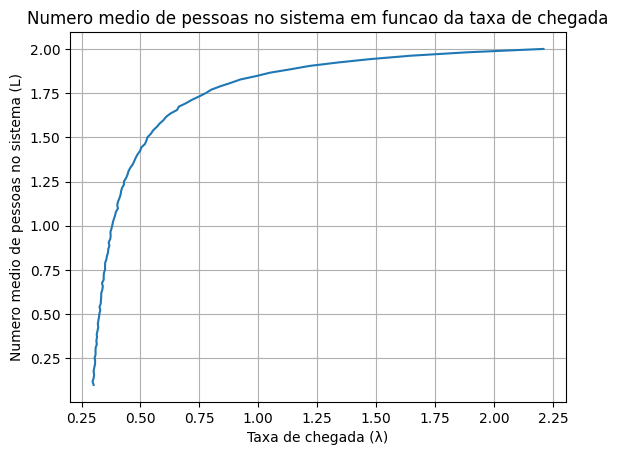

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def simular_spa(taxa_chegada, taxa_servico_massagem, taxa_servico_acupuntura, num_simulacoes=10000):
    valores_L = []

    for lambda_ in taxa_chegada:
        soma_L = 0

        for _ in range(num_simulacoes):
            tempo = 0
            num_clientes = 0
            num_em_servico_massagem = 0
            num_em_servico_acupuntura = 0
            esperando_massagem = 0

            while num_clientes < 2:
                tempo_interchegada = np.random.exponential(1 / lambda_)
                tempo += tempo_interchegada
                num_clientes += 1

                if num_em_servico_massagem < 1:
                    num_em_servico_massagem += 1
                    tempo_servico_massagem = np.random.exponential(1 / taxa_servico_massagem)
                    tempo += tempo_servico_massagem
                    num_em_servico_massagem -= 1

                    if esperando_massagem > 0:
                        esperando_massagem -= 1
                        num_em_servico_massagem += 1
                        tempo_servico_massagem = np.random.exponential(1 / taxa_servico_massagem)
                        tempo += tempo_servico_massagem

                elif num_em_servico_acupuntura < 1:
                    num_em_servico_acupuntura += 1
                    tempo_servico_acupuntura = np.random.exponential(1 / taxa_servico_acupuntura)
                    tempo += tempo_servico_acupuntura
                    num_em_servico_acupuntura -= 1

                else:
                    esperando_massagem += 1

            soma_L += tempo / 10

        valores_L.append(soma_L / num_simulacoes)

    return valores_L


taxa_chegada = np.linspace(0.1, 2, 100)
taxa_servico_massagem = taxa_servico_acupuntura = 1


valores_L = simular_spa(taxa_chegada, taxa_servico_massagem, taxa_servico_acupuntura)


plt.plot(valores_L[::-1],taxa_chegada)
plt.xlabel('Taxa de chegada (λ)')
plt.ylabel('Numero medio de pessoas no sistema (L)')
plt.title('Numero medio de pessoas no sistema em funcao da taxa de chegada')
plt.grid(True)
plt.show()

Letra b)

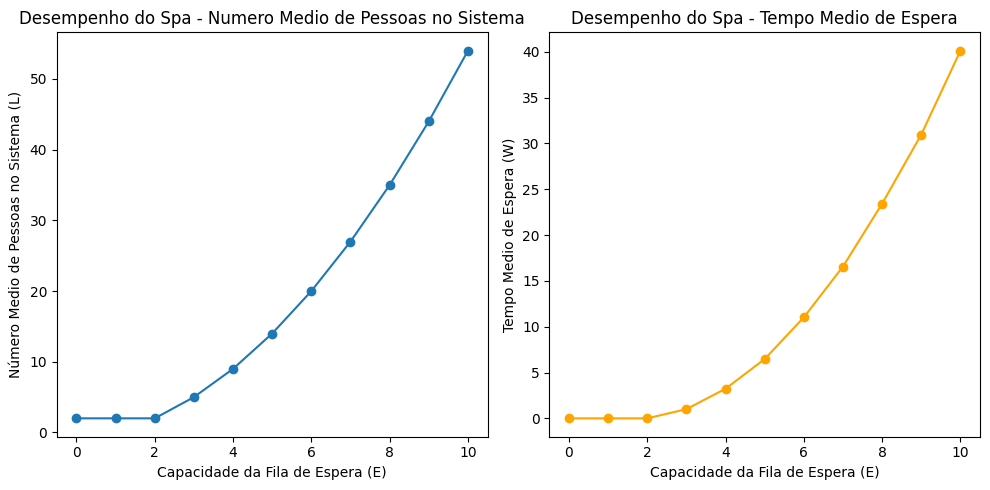

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def simular_Spa(taxa_chegada, taxa_servico_massagem, taxa_servico_acupuntura, tamanho_fila, num_simulacoes=10000):
    valores_L = []
    valores_W = []

    for E in tamanho_fila:
        soma_L = 0
        soma_W = 0

        for _ in range(num_simulacoes):
            tempo = 0
            num_clientes = 0
            fila_espera = 0
            tempo_espera = 0

            while True:
                tempo_interchegada = np.random.exponential(1 / taxa_chegada)
                tempo += tempo_interchegada
                num_clientes += 1

                if fila_espera > 0:
                    fila_espera -= 1
                    tempo_espera += tempo_interchegada

                elif num_clientes <= 2:
                    tempo_servico_massagem = np.random.exponential(1 / taxa_servico_massagem)
                    tempo += tempo_servico_massagem

                    if num_clientes == 2:
                        fila_espera += 1
                        tempo_espera += tempo_servico_massagem

                    else:
                        num_clientes += 1

                else:
                    tempo_servico_acupuntura = np.random.exponential(1 / taxa_servico_acupuntura)
                    tempo += tempo_servico_acupuntura
                    fila_espera += 1
                    tempo_espera += tempo_servico_acupuntura

                soma_L += num_clientes
                soma_W += tempo_espera

                if num_clientes >= E:
                    break

        valores_L.append(soma_L / num_simulacoes)
        valores_W.append(soma_W / num_simulacoes)

    return valores_L, valores_W

tamanho_fila = range(11)
taxa_chegada = 0.8
taxa_servico_massagem = 1
taxa_servico_acupuntura = 1

valores_L, valores_W = simular_Spa(taxa_chegada, taxa_servico_massagem, taxa_servico_acupuntura, tamanho_fila)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(tamanho_fila, valores_L, marker='o')
plt.xlabel('Capacidade da Fila de Espera (E)')
plt.ylabel('Número Medio de Pessoas no Sistema (L)')
plt.title('Desempenho do Spa - Numero Medio de Pessoas no Sistema')

plt.subplot(1, 2, 2)
plt.plot(tamanho_fila, valores_W, marker='o', color='orange')
plt.xlabel('Capacidade da Fila de Espera (E)')
plt.ylabel('Tempo Medio de Espera (W)')
plt.title('Desempenho do Spa - Tempo Medio de Espera')

plt.tight_layout()
plt.show()


# Exercício 3:

Letra a)

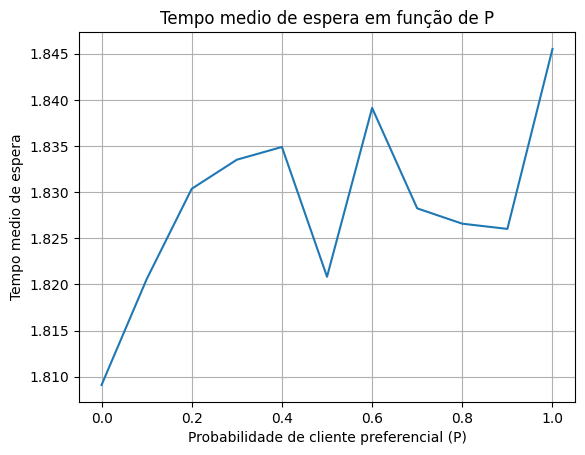

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def simular_banco(P, tempo_simulacao=10000, lambda_=1, mu=1.2):
    tempos_espera = []
    for _ in range(tempo_simulacao):
        tempo = 0
        fila = []
        while True:
            chegada_cliente = np.random.exponential(1/lambda_)
            tempo += chegada_cliente
            tipo_cliente = 'preferencial' if np.random.random() < P else 'regular'
            fila.append((tipo_cliente, tempo))

            if len(fila) == 1:
                atendimento = np.random.exponential(1/mu)
                tempo += atendimento
                fila.pop(0)
                tempos_espera.append(tempo)

            if len(fila) == 0:
                break

    return np.mean(tempos_espera)

valores_P = np.linspace(0, 1, 11)

tempos_medios = [simular_banco(P) for P in valores_P]

plt.plot(valores_P, tempos_medios)
plt.xlabel('Probabilidade de cliente preferencial (P)')
plt.ylabel('Tempo medio de espera')
plt.title('Tempo medio de espera em função de P')
plt.grid(True)
plt.show()

Letra b)

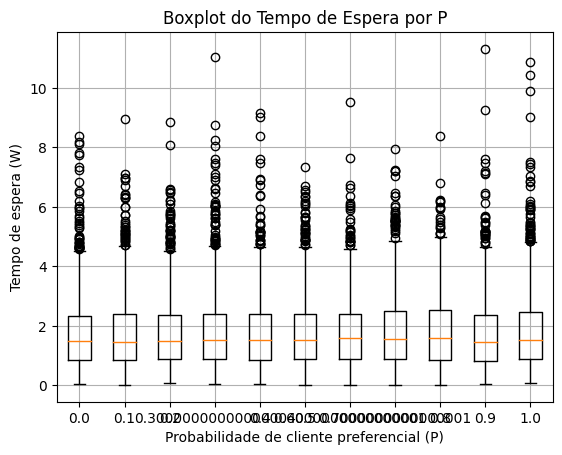

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def simular_fila(P, tempo_simulacao=1000, lambda_=1, mu=1.2):
    tempos_espera = []
    for _ in range(tempo_simulacao):
        tempo = 0
        fila = []
        while True:
            chegada_cliente = np.random.exponential(1/lambda_)
            tempo += chegada_cliente
            tipo_cliente = 'preferencial' if np.random.random() < P else 'regular'
            fila.append((tipo_cliente, tempo))
            if len(fila) == 1:
                atendimento = np.random.exponential(1/mu)
                tempo += atendimento
                fila.pop(0)
                tempos_espera.append(tempo)
            if len(fila) == 0:
                break
    return tempos_espera

valores_P = np.linspace(0, 1, 11)

tempos_espera_por_P = {P: simular_fila(P) for P in valores_P}

dados_boxplot = [tempos_espera_por_P[P] for P in valores_P]

plt.boxplot(dados_boxplot, labels=valores_P)
plt.xlabel('Probabilidade de cliente preferencial (P)')
plt.ylabel('Tempo de espera')
plt.title('Boxplot do Tempo de Espera por P')
plt.grid(True)
plt.show()


Mesmo arredondando o gerador de probabilidades, o eixo x continuou com esse problema visual...

# Exercício 4:

In [6]:

import numpy as np
def simuladorDeFilas(taxa_chegada, taxa_servico, num_simulacoes=10000):
    valores_W = []
    valores_ocioso = []

    for lambda_ in taxa_chegada:
        soma_W = 0
        soma_ocioso = 0

        for _ in range(num_simulacoes):
            tempo = 0
            num_clientes = 0
            num_em_servico = 0
            tempo_ocioso = 0

            while num_clientes < 2:
                tempo_interchegada = np.random.exponential(1 / lambda_)
                tempo += tempo_interchegada
                num_clientes += 1

                if num_em_servico < 1:
                    num_em_servico += 1
                    tempo_servico = np.random.exponential(1 / taxa_servico)
                    tempo += tempo_servico
                    num_em_servico -= 1

                else:
                    tempo_ocioso += tempo_interchegada

            soma_W += tempo / 10
            soma_ocioso += tempo_ocioso

        valores_W.append(soma_W / num_simulacoes)
        valores_ocioso.append(soma_ocioso / num_simulacoes)

    return valores_W, valores_ocioso

taxa_chegada_MM1 = np.array([1, 1]) # assim simulamos duas filas dentro do mesmo sistema
taxa_chegada_MM2 = np.array([2])
taxa_servico = 1

valores_W_MM1, valores_ocioso_MM1 = simuladorDeFilas(taxa_chegada_MM1, taxa_servico)
valores_W_MM2, valores_ocioso_MM2 = simuladorDeFilas(taxa_chegada_MM2, taxa_servico)

print("Tempo medio de espera para as filas M/M/1:")
print(valores_W_MM1)
print("Tempo medio de espera para a fila M/M/2:")
print(valores_W_MM2)
print("Tempo medio que um atendente fica ocioso para as filas M/M/1:")
print(valores_ocioso_MM1)
print("Tempo medio que um atendente fica ocioso para a fila M/M/2:")
print(valores_ocioso_MM2)

Tempo medio de espera para as filas M/M/1:
[0.402165586156749, 0.4044566098004394]
Tempo medio de espera para a fila M/M/2:
[0.29930674044640954]
Tempo medio que um atendente fica ocioso para as filas M/M/1:
[0.0, 0.0]
Tempo medio que um atendente fica ocioso para a fila M/M/2:
[0.0]


O tempo ocioso dos atendentes tende a 0 pois a taxa de chegada e de saída é igual.

# Exercício 5:

In [16]:
import random
import numpy as np

def simulacao_rede(lambdas, mus, Tmax=10**3):
    num_cruzamentos = len(lambdas)
    filas = [[] for _ in range(num_cruzamentos)]
    tempos = [0]

    infos = []

    tempo_atual = 0

    while tempo_atual < Tmax:
        taxas_chegada = lambdas
        taxas_saida = mus

        probabilidades = np.array(taxas_chegada + taxas_saida, dtype=np.float64)
        probabilidades /= np.sum(probabilidades)

        # escolha de evento com base nas probabilidades calculadas acima
        evento = random.choices(['chegada'] * num_cruzamentos + ['saida'] * num_cruzamentos, probabilidades)[0]

        if evento == 'chegada':
            cruzamento = random.randrange(num_cruzamentos)  # escolha aleatoria de cruzamento
            tempo_chegada = np.random.exponential(1 / lambdas[cruzamento])
            tempo_atual += tempo_chegada
            filas[cruzamento].append(tempo_atual)
            infos.append(('chegada', cruzamento, tempo_atual))

        else:
            cruzamento = random.randrange(num_cruzamentos)
            if filas[cruzamento]:
                tempo_atendimento = np.random.exponential(1 / mus[cruzamento])
                tempo_atual += tempo_atendimento
                filas[cruzamento].pop(0)
                infos.append(('saida', cruzamento, tempo_atual))

        tempos.append(tempo_atual)

    return tempos, infos, filas

def tempo_medio_espera(infos, num_cruzamentos):
    tempo_espera = [0] * num_cruzamentos
    qtd_chegadas = [0] * num_cruzamentos
    tempo_chegada = [0] * num_cruzamentos  # armazena o tempo de chegada do ultimo carro em cada cruzamento

    for evento in infos:
        if evento[0] == 'saida':
            cruzamento = evento[1]
            tempo_saida = evento[2]
            tempo_espera[cruzamento] += tempo_saida - tempo_chegada[cruzamento]
            qtd_chegadas[cruzamento] += 1
        elif evento[0] == 'chegada':
            cruzamento = evento[1]
            tempo_chegada[cruzamento] = evento[2]

    return [tempo_espera[i] / qtd_chegadas[i] if qtd_chegadas[i] != 0 else 0 for i in range(num_cruzamentos)]


# os lambdas foram definidos com base no calculo de entradas e saidas de cada cruzamento
# levando em conta os valores respectivos. Arredondados.
# por exemplo: lambda de C eh o lambda2+(0.75*muA) enquanto lambda E eh o muC
# [A, B, C, D, E]
lambdas = [10, 27, 25, 30, 7]  # taxas de chegada
mus = [15, 30, 24, 20, 6]  # taxas de saida

# realiza a simulação crescente e calcula o tempo medio de espera para cada cruzamento
resultados = {}
for i in range(len(lambdas)):
    mus_modificado = mus.copy()
    mus_modificado[i] += 5  # aumenta a taxa de saida em 5 para cada cruzamento (suposta melhoria da prefeitura)
    tempos, infos, _ = simulacao_rede(lambdas, mus_modificado)
    resultados[f'Cruzamento {chr(65 + i)}'] = tempo_medio_espera(infos, len(lambdas))

print("Tempo medio de espera em cada cruzamento:")
for cruzamento, tempos_medios in resultados.items():
    print(f"{cruzamento}: {np.mean(tempos_medios):.2f} minutos")


Tempo medio de espera em cada cruzamento:
Cruzamento A: 0.65 minutos
Cruzamento B: 0.67 minutos
Cruzamento C: 0.70 minutos
Cruzamento D: 0.66 minutos
Cruzamento E: 0.58 minutos


A medida que aumentados a taxa de saída, verificamos o quanto essa obra da prefeitura influenciaria o fluxo de carros. Todos os cruzamentos estão recebendo aumentos em seu fluxo de saída e o cruzamento C, mantém acima dos outros em relação ao seu tempo de espera.

Isso significa que este é o cruzamento mais problemático, inclusive após melhorias em todos os cruzamentos, este continua com o pior tempo de espera.

Portanto, este é o cruzamento que mais se beneficiará com alterações da prefeitura, visto que é o que mais exige mudanças para melhorar seu fluxo de saída.